# 22 September 2021

## **Latihan Logistic Regression**

**Gunakan dataset 'titanic' dari seaborn.**

    - Target = survived
    - Fitur = pclass, sex, age, fare

- Isi missing value jika ada
- Cek multicollinearity
- Split data menjadi train dan test set dengan proporsi 80:20
- Buat intepretasi hasil summary
- Cek dan interpretasi akurasi model terhadap test set

Data splitting --> train dan test + validasi

train --> untuk membangun model 
validasi ---> untuk mencari model terbaik
test --> untuk menguji performa model dan juga mengetahui apakah model bisa menggeneralisasi dengan baik


80:20, 70:30, 60:20:20
90, 5, 5 --> 5% dari validasi dan test itu datanya sudah mewakili variance dari keseluruhan data.

0 dan 1

stratify = y

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor # untuk mengalkulasi nilai VIF

from sklearn.model_selection import train_test_split # untuk membagi data secara acak
from sklearn.metrics import accuracy_score # untuk menghitung nilai akurasi

import warnings
warnings.filterwarnings("ignore") # untuk menghilangkan warning yang muncul setelah menjalankan cell

### **Info mengenai dataset dapat dilihat pada tautan berikut:** <https://www.kaggle.com/c/titanic/data>

## **Load Dataset**

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df[['survived', 'pclass', 'sex', 'age', 'fare']]

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


## **Define X and y**

In [4]:
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

## **Imputing missing values**

In [5]:
# Check missing values
X.isna().sum()

pclass      0
sex         0
age       177
fare        0
dtype: int64

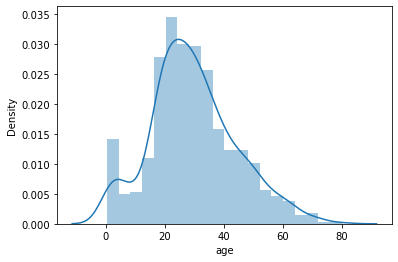

In [6]:
sns.distplot(df['age']);

In [7]:
# Normality test check for imputing strategy
from scipy.stats import normaltest
normaltest(df['age'].dropna())

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

In [8]:
# Check the median of age feature
X['age'].median()

28.0

In [9]:
# Fill the missing values
X['age'] = X['age'].fillna(X['age'].median())

In [10]:
# Recheck missing value
X.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

## **Create a dummy variable**

In [11]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


## **Multicollinearity check**

In [12]:
# Function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes', 'No') 
    return (vif) 

In [13]:
calc_vif(X)

,variables,VIF,Acceptable
0,pclass,3.728285,Yes
1,age,4.057797,No
2,fare,1.426615,Yes
3,sex_male,2.901604,Yes


### **Interpretasi**

Hanya fitur age yang memiliki nilai VIF sedikit di atas 4. Dalam kasus ini, nilai tersebut masih dapat ditoleransi dan interpretasi coef nantinya dapat dianggap valid.

## **Data Splitting**

In [14]:
# Splitting data
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    stratify = y, # digunakan untuk menjaga proporsi tiap kelas sesuai dengan data keseluruhan
    test_size = 0.2, # ukuran dari test set
    random_state = 0 # digunakan agar output yang dihasilkan tetap sama meskipun di-run berulang kali 
)

In [15]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Target --> survived 

0 --> yang tidak survived --> 549
1 --> yang survived --> 342

In [16]:
# Check the shapes
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(891, 4)
(712, 4)
(179, 4)


## **Logistic regression modelling using statsmodels**

In [17]:
sm_logit = sm.Logit(y_train, sm.add_constant(X_train))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.444076
         Iterations 6


In [18]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.3329
Time:                        17:43:22   Log-Likelihood:                -316.18
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 4.628e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7614      0.585      8.142      0.000       3.615       5.908
pclass        -1.1880      0.156     -7.628      0.000      -1.493      -0.883
age           -0.0345      0.008     -4.073      0.0

## **Interpretasi**

Output yang perlu diperhatikan:
1. LLR p-value
2. P>|z| (p-value tiap variable)
3. coef (Beta atau koefisien regresi tiap variable)

In [19]:
# Interpretasi hanya berlaku/valid pada rentang berikut
df.describe().loc[['min', 'max']][['pclass', 'age', 'fare']]

,pclass,age,fare
min,1.0,0.42,0.0000
max,3.0,80.00,512.3292


**Yang dimodelkan adalah peluang seseorang dapat bertahan hidup dari kecelakaan kapal Titanic**

1. LLR p-value = 4.628e-67 = 0.0000...4628

   - LLR p-value < 0.05, itu berarti kita dapat menolak null hypothesis (H0). Dapat dikatakan minimal ada satu variable independen yang berpengaruh signifikan terhadap tingkat survival seseorang.
<br><br>

2. P>|z| (Wald test)

   - const = 0.000. p-value < 0.05, tolak H0. Artinya, model membutuhkan nilai intercept.
   - pclass = 0.000. p-value < 0.05, tolak H0. Artinya, kelas tiket penumpang berpengaruh signifikan secara negatif terhadap tingkat survival (semakin besar angka kelas (kelas 3), semakin kecil pula peluang bertahan hidupnya).
   - age = 0.000. p-value < 0.05, tolak H0. Artinya, umur penumpang berpengaruh signifikan secara negatif terhadap tingkat survival (semakin tua penumpang, semakin kecil pula peluang bertahan hidupnya).
   - fare = 0.547. p-value > 0.05, gagal menolak H0. Artinya, besaran ongkos yang dibayarkan penumpang tidak berpengaruh signifikan terhadap tingkat survival.
   - sex_male = 0.000. p-value < 0.05, tolak H0. Artinya, jenis kelamin (penumpang pria) berpengaruh signifikan secara negatif terhadap tingkat survival (Penumpang pria cenderung tidak dapat bertahan hidup, karena mungkin lebih mendahulukan untuk menyelamatkan penumpang wanita dan anak-anak).
<br><br>

3. Coef
   - const = 4.7614
   - pclass = -1.1880
   - age = -0.0345
   - fare = 0.0013 (tidak perlu diinterpretasikan karena tidak berpengaruh signifikan terhadap tingkat survival seseorang)
   - sex_male = -2.6591

***Interpretasi coef dengan menggunakan Odd Ratio (OR)***

OR = exp(beta(c-a))

- Jika OR > 1, c > a: tingkat kesuksesan (success rate) meningkat jika Xi meningkat.
- Jika OR < 1, c > a: tingkat kesuksesan (success rate) menurun jika Xi meningkat.

In [20]:
# Interpretasi pclass

c = 3
a = 1 # pilih c dan a pada rentang 1-3, dengan c > a
Beta = -1.1880

OR_pclass = np.exp(Beta*(c-a))
print('OR_pclass =', OR_pclass)

OR_pclass_interpretation = 1/OR_pclass
print('OR_pclass_interpretation =', OR_pclass_interpretation)

OR_pclass = 0.0929215212131989
OR_pclass_interpretation = 10.761769576561306


### **pclass**

- OR_pclass < 1, tingkat kesuksesan meningkat saat Xi (pclass) menurun (3 ke 1).
- OR_pclass < 1, penumpang kelas 1, kemungkinan dapat bertahan hidup 10.76 kali lebih besar daripada penumpang kelas 3.

In [21]:
# Interpretasi age

c = 50
a = 40 # pilih c dan a pada rentang 0-80, dengan c > a
Beta = -0.0345

OR_age = np.exp(Beta*(c-a))
print('OR_age =', OR_age)

OR_age_interpretation = 1/OR_age
print('OR_age_interpretation =', OR_age_interpretation)

OR_age = 0.7082203534678
OR_age_interpretation = 1.411989919667659


### **age**

- OR_age < 1, tingkat kesuksesan meningkat saat Xi (age) menurun (umur 50 ke 40).
- OR_age < 1. penumpang berumur 40 tahun, kemungkinan bertahan hidupnya 1.41 kali lebih besar dibandingkan penumpang berumur 50 tahun.

In [22]:
# Interpretasi sex_male

c = 1
a = 0
Beta = -2.6591

OR_sex_male = np.exp(Beta*(c-a))
print('OR_sex_male =', OR_sex_male)

OR_sex_male_interpretation = 1/OR_sex_male
print('OR_sex_male_interpretation =', OR_sex_male_interpretation)

OR_sex_male = 0.07001120348175598
OR_sex_male_interpretation = 14.283428226749269


### **sex_male**

- OR_sex_male < 1, tingkat kesuksesan meningkat saat Xi (sex) adalah wanita.
- OR_sex_male < 1, penumpang wanita, kemungkinan bertahan hidupnya 14.2 kali lebih besar dibandingkan penumpang pria.

## **Validate the model using test set**

In [29]:
# Check the model result
y_predict_proba = result.predict(sm.add_constant(X_test))
y_predict_class = np.where(y_predict_proba > .5, 1, 0)

In [30]:
y_predict_proba

153    0.055234
752    0.069960
610    0.473449
200    0.082047
310    0.945617
         ...   
96     0.184129
440    0.704350
75     0.089984
575    0.109310
143    0.108314
Length: 179, dtype: float64

In [24]:
y_predict_class

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

### **Evaluation metrics**

In [25]:
print('Model accuracy score in the test set:', accuracy_score(y_test, y_predict_class))

Model accuracy score in the test set: 0.7877094972067039


### **Interpretasi hasil metrics**

Katakanlah ada 100 penumpang yang diprediksi oleh model, maka 78 penumpang akan terprediksi (survived or not survived) dengan benar.

## **Check the accuracy of model by sklearn**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
accuracy_score(y_test, model.predict(X_test))

0.7877094972067039

Untuk kasus ini, modelling menggunakan statsmodels dan sklearn dengan menggunakan random_state = 0 menghasilkan nilai akurasi yang sama.